In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
style.use('ggplot')
RSEED = 12

## Welcome!
The main mission of this notebook is to predict with the help of machine learning algorithms whether a passenger has survived the Titanic disaster or not.

This notebook is divided into 3 main parts:
1. Exploratory Data Analysis - The analysis of the given dataset with visual methods.
2. Data prepartion - includes data imputation and feature engineering.
3. Machine Learning - where the acutal predictions are made using machine learning algorithms.


## Background
The RMS (royal mail ship) Titanic was a British passenger liner operated by the White Star Line (which was a british shipping company) that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage (the first journey of the craft) from Southampton, England to New York City, USA.<br><br> There were an estimated of 2,224 passengers and crew aboard. More than 1,500 died.

Here is a Picture of the titanic departing from Southampton, England on April 10, 1912 taken by the scottish photgrapher Francis Godolphin Osbourne Stuart (1843–1923):
![titatnic](img/979px-RMS_Titanic_3.jpg)

<br><br>The route of the voyage of the Titanic and the location of her sinking, taken from [here](https://en.wikipedia.org/wiki/RMS_Titanic#/media/File:Titanic_voyage_map.png):
![titanic route](img/titanic_route.JPG)

## Question 2 - Exploratory data analysis - RMS Titanic
The theme and "spirit" of the "Exploratory data analysis" section of this notebook is more focused towards the history and the people who were onboard the Titanic.<br><br>
After each graph we've written chosen conclusions that can be drawn from it. These conclusions has led us into an abundance of intersting historical facts and figures which were worth mentioning, and added a lot of depth and meaning to the superficial statistical numbers.
<br><br>

Happy Reading!

### Loading the training data set

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Data Description 
1. **PassengerId** (discrete int) - a unique identifying number assigned to each passenger.
2. **Survived** (discrete int) - a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass** (discrete int) - the passenger class. Also describes the socio-economic status (SES) of the passenger (i.e., 1 = 1st (upper) class, 2 = 2nd (middle) class, 3 = 3rd (lower) class).
4. **Name** (string) - the name of the passenger.
5. **Sex** (string) - indicates the gender of the passenger (i.e., Male or female).
6. **Age** (continuous float) - indicates the age of the passenger. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
7. **SibSp** (discrete int) - the number of siblings/spouses aboard.<br>
    *Sibling = brother, sister, stepbrother, stepsister<br>
    *Spouse = husband, wife (mistresses and fiancés were ignored)
8. **Parch** (discrete int) - the number of parents/children aboard.<br>
     *Parent = mother, father.<br>
     *Child = daughter, son, stepdaughter, stepson<br>
     *Some children travelled only with a nanny, therefore parch=0 for them.<br>
9. **Ticket** (alphanumeric string) - indicates the ticket number issued to the passenger.
10. **Fare** (continuous float) - indicates the amount of money spent on their ticket.
11. **Cabin** (alphanumeric string) - indicates the cabin category occupied by the passenger.
12. **Embarked** (alphanumeric string) - indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).

#### Descriptive statistics
The following table will allow us to gain some insight into the dataset.

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusions**:
1. The total number of samples in the training dataset is 891.
2. The average ticket price (Fare) was ~32\\$ which is equvalent to ~800\\$ today.
3. The maximum ticket price was ~512$, or 12,800\\$ in today's money!
4. The average age on the titanic was ~30, the oldest passenger was 80 years old.
It is worth noting that average [life expectancy in england](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/lifeexpectancies/articles/howhaslifeexpectancychangedovertime/2015-09-09) in the 1914 was roughly 51 for men and 55 for women. Today it stand on ~80 for men and ~83 for women.
5. Most passengers, at least 75%, were at the age of 0.4-38.
6. The biggest family on the titanic had 8 family members.

### Scatter matrix
The scatter matrix will hopefully help us notice some patterns or correlations between features.<br>
Before using the Scatter matrix, we must prepare our data:

#### Data prepartion for scatter matrix
We will transform the training set into a dataframe with only numerical values.

In [4]:
# We'll make a hard copy of the training set, inorder to make a numerical only dataset 
df_train_numerical = df_train.copy()

# Apply label encoding to "Sex" feature - male to 1 and female to 0
le = preprocessing.LabelEncoder()
df_train_numerical['Sex'] = le.fit_transform(df_train_numerical['Sex'].values)
df_train_numerical = df_train_numerical[["Survived", "Pclass", "Sex","Age","SibSp","Parch","Fare"]]
df_train_numerical.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


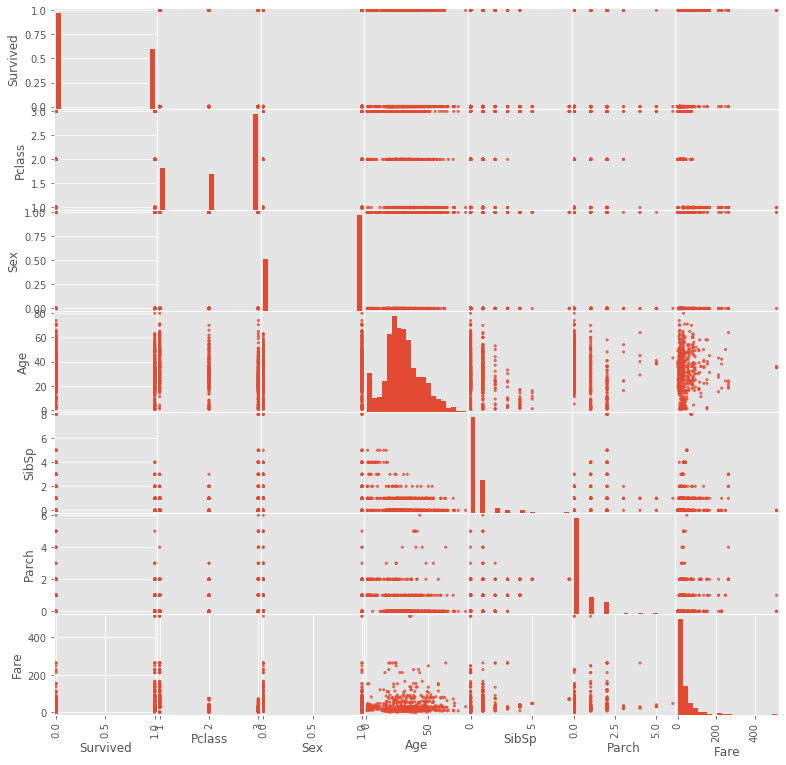

In [5]:
scatter_matrix = pd.plotting.scatter_matrix(df_train_numerical, figsize=[13,13],
                                            marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)
for ax in scatter_matrix.ravel():
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

**Conclusions**:
1. (4th column, 4th row) - it looks like the age of most of the passengers ragnes between 20-40.
2. (5th column, last row) - Most of the passengers had 0 siblings onboard.
3. (4th column, last row) - Fare (ticket prices) mostly range between 0\$-100\$ (probably bought by the 3rd and 2nd classes), some above 200\$ (seemingly 1st class) and very little above 400$ (the most luxurious 1st class rooms).

### Correlation Matrix

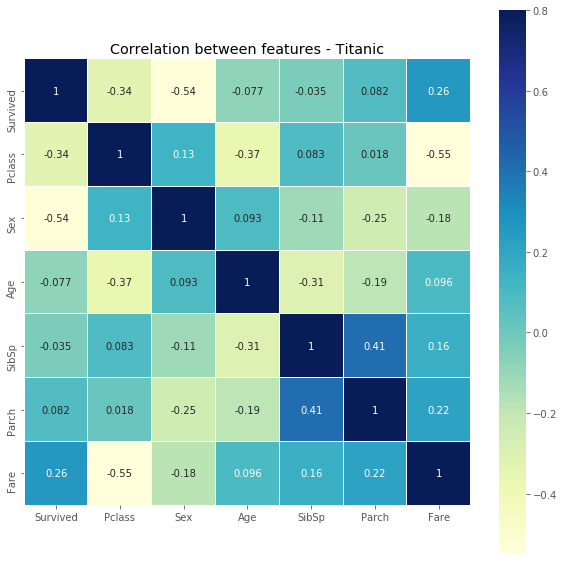

In [6]:
corr=df_train_numerical.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features - Titanic');

**Conclusions**:
1. There is a correlation between SibSp & Parch (0.41) - This makes sense since they both deal with the amount of faimly siblings on board a passenger had.
2. There is a positive correlation between Fare and Survived (0.26) indicating that those who paid more had higher chances of survival.
3. There is a strong negative correlation between Pclass & Fare (-0.55). This also makes sense because the lower the social class was, the lower the passenger had to pay.
4. There is a fare amount of negative correlation between Survived & Pclass (-0.34) - which tells us that lower the social status of passenger, the less likely of that passenger to survive.

### Visualizing the data via T-SNE
In this section we'll use the dimensionality reduction algorithm T-SNE on the titanic dataset in order to see if any interesting patterns emerge.<br>
First we must convert the categorical features into numerical features, and ensure that the columns dont contain null values:

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see the "Age","Cabin", and "Embarked" features contain null values.<br>
For "Age" & "Cabin", we'll fill them with the median, and "Cabin" will be dropped.
Than we'll encode the categorical features with numerical representation (label encoding).<br><br>

**Note!!!** This data imputation is "quick and dirty" and is done only for the T-SNE algorithm.<br> "Question 3" contains a thorough and comprehensive data imputation in prepartion for the machine learning algorithms in "Question 4". 

In [8]:
numerical_df = df_train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
numerical_df['Age'].fillna(numerical_df['Age'].median(),inplace=True)
embarked_median = numerical_df['Embarked'].value_counts().idxmax()
numerical_df['Embarked'].fillna(embarked_median, inplace =True)

categoricals = ["Sex", "Embarked"]
numerical_df[categoricals] = numerical_df[categoricals].apply(preprocessing.LabelEncoder().fit_transform)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
X_2d = tsne.fit_transform(numerical_df)
tsne_df = pd.DataFrame(data=X_2d, columns=['x','y'])
tsne_df['Survived'] = numerical_df['Survived']


In [10]:
tsne_df

,x,y,Survived
0,13.476875,-12.670317,0
1,-30.466406,0.556486,1
2,17.633213,-6.234621,1
3,-25.307577,0.371877,1
4,10.708167,11.285502,0
...,...,...,...
886,8.313059,0.813482,0
887,-8.977210,-5.624804,1
888,-6.027086,-0.942542,0
889,-10.179070,-1.761902,1


#### Plotting the T-SNE graph

Text(0, 0.5, 'T-SNE 2')

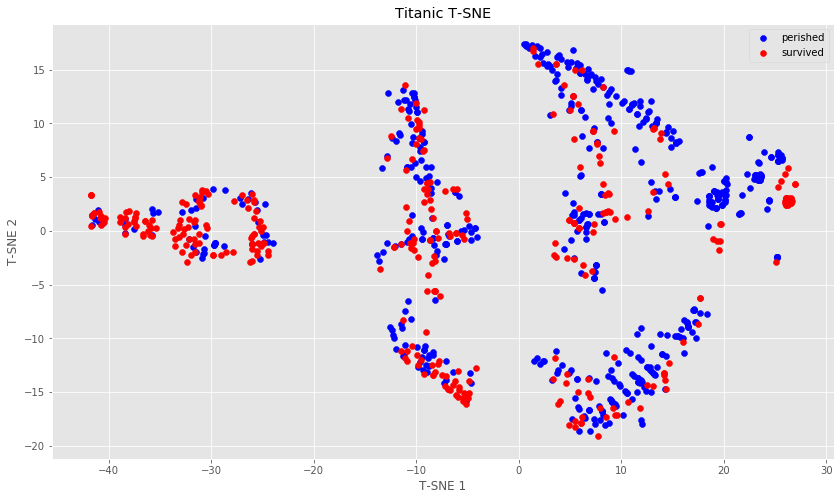

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['blue','red']
labels = ['perished','survived']
for i in range(len(labels)):
    ax.scatter(tsne_df.loc[tsne_df['Survived']==i,'x'], tsne_df.loc[tsne_df['Survived']==i,'y'],
               c=colors[i], label = labels[i])
ax.legend()
plt.title('Titanic T-SNE')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

**Conclusions**: As we can see, we can divide the dataset into mainly 3 clusters:
1. the leftmost cluster (-40 to -20 on the x axis) which contains the most tight & grouped amount of survivers. 
2. The middle cluster (-15 to 0 on the x axis), a bit more sparse the 1st cluster.
3. The rightmost cluster (0 to 30 on the x axis) the most sparse cluster - to the naked eye it seems that it contains the least amount of survivors.

From the graph we can conclude the there are some features, single or combined, which have a great impact on the survival rate of the passengers. As we dive deeper into the dataset, we hope to find those features and understand why they were so crucial to the survival of the passengers onboard.

### Survival  - males in comparison to females
In the following section we'll examine the survival rate between the two genders.<br>
First, we'll look at the total numbers per each gender group.

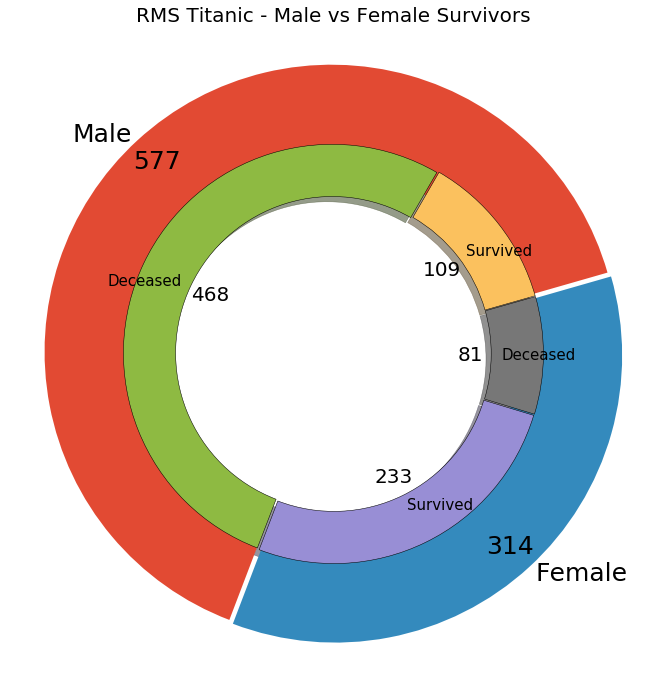

In [12]:
# functions which turn the percent on the pie chart into the actual values
def absolute_value1(val):
    a  = np.round(val/100*sum(data_sex), 0)
    return int(a)
def absolute_value2(val):
    a  = np.round(val/100*sum(data_survivors), 0)
    return int(a)

# Outer pie - Gender distribution
total_male = df_train["Sex"][df_train["Sex"]=="male"].count()
total_female = df_train["Sex"][df_train["Sex"]=="female"].count()
data_sex = [total_male, total_female]

# Inner pie - Survivors and Deceased
female_survived = df_train["Survived"][(df_train["Sex"]=="female") & (df_train["Survived"]==1)].count()
female_deceased= df_train["Survived"][(df_train["Sex"]=="female") & (df_train["Survived"]==0)].count()
male_survived = df_train["Survived"][(df_train["Sex"]=="male") & (df_train["Survived"]==1)].count()
male_deceased = df_train["Survived"][(df_train["Sex"]=="male") & (df_train["Survived"]==0)].count()
data_survivors = [female_survived, female_deceased, male_survived, male_deceased]

# Plotting
fig, ax = plt.subplots(figsize=(12,12))
_, texts1, autotexts1 = ax.pie(data_sex, labels=["Male", "Female"],  pctdistance=0.9,
                               labeldistance = 1.03,radius=1.1, wedgeprops = {"width":0.4}, 
                               explode=(0.01,0.01),autopct=absolute_value1,startangle=16)

_, texts2, autotexts2 = ax.pie(data_survivors, labels=["Survived", "Deceased", "Survived", "Deceased"],
                               pctdistance=0.65, labeldistance = 0.8, radius=0.8, rotatelabels=0,
                               wedgeprops ={"width":0.2,"edgecolor":'black'}, autopct=absolute_value2,
                               explode = (0.005,0.005,0.005,0.005), startangle=-111, shadow=True)
[num.set_fontsize(25) for num in autotexts1]
[text.set_fontsize(25) for text in texts1]; # increase label font size
[num.set_fontsize(20) for num in autotexts2]
[text.set_fontsize(15) for text in texts2]; # increase label font size
ax.set_title("RMS Titanic - Male vs Female Survivors", fontsize = 20);

The outer pie chart shows the distribution between males and females on the Titanic.
The iner pie chart shows the distribution between those who survived and deceased in each group.<br><br>
**Conclusions**:
1. According to the outer pie chart, out of 891 samples there were 577 males and 314 females.<br>
2. The inner chart shows that out of 577 males -  468 died and 109 survived.<br>

Next, we'll check  the relative survival rate per sex.

### Survival rates per sex
Lets see the relative survival rate per each male and females

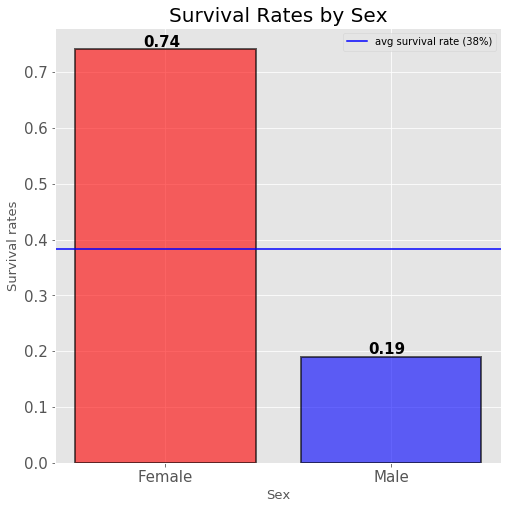

In [13]:
female_survival_rate = female_survived / total_female
male_survival_rate = male_survived / total_male
sex_survival_rates = [female_survival_rate, male_survival_rate]

# Avg titanic survival rate
avg_survival_rate = len(df_train.loc[df_train["Survived"]==1])/len(df_train)

fig,ax = plt.subplots(figsize=(8,8))
ax.axhline(avg_survival_rate,color="blue")
bars = ax.bar(x=["Female","Male"], color=["red","blue"],
              height=sex_survival_rates, alpha=0.6, edgecolor='black', linewidth=2)

ax.legend(labels=["avg survival rate (38%)"])
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
for index, value in enumerate(np.around(sex_survival_rates,2)):
    ax.text(x=index-0.1, y=value+0.005, s=f"{value:,}", color='black', fontweight='bold',size=15);
ax.set_title("Survival Rates by Sex",size=20)
ax.set_xlabel("Sex",size = 13)
ax.set_ylabel("Survival rates", size=13);


Note - The male survival rate was calculated in the following way:<br><br>
\begin{align}
\frac{109\:(male\:survivors)}{577\:(total\:males)}*100 = 18.89\%\:(male\:survivor\:rate)
\end{align}
<br>
female survival rate was calculated in the following way:.<br><br>
\begin{align}
\frac{233\:(female\:survivors)}{314\:(total\:females)}*100 = 74.2\%\:(female\:survivor\:rate)
\end{align}
<br>

**Conclusion**: The females had a much higher survival rate than the males, and higher than the average survival rate (38%).<br><br>
The high female surviving rate (74%) in comparison to the lower male surviving rate (19%) is consistent with the **"women and children first"** protocol - a code of conduct dating from 1852, whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited, as it was in the Titanic.<br><br>
The protocol is wonderfully depicted in this great painting taken from Robort D. Ballard's book " Exploring The Titanic", where we see men saying their last goodbyes from their wives and children:
![Women_And_Children_First_The_Sphere.jpg](img/Women_And_Children_First_The_Sphere.jpg)


### Survival rate  according to social classes
The Titanic was an extremely luxurious ship in its time. It had many features that amazed even the richest of the rich. The ship was divided up into three social classes (expensive to cheapest):<br>First class, second class, and third class.<br> The following pictures depict the habitats of the classes on the ship:
![titanic_classes.jpg](img/titanic_classes.jpg)
In this section we want to find if the "woman & children first" protocol was applied to everyone, regardless of their social status.

#### Checking the total number of survivors and deceased per class

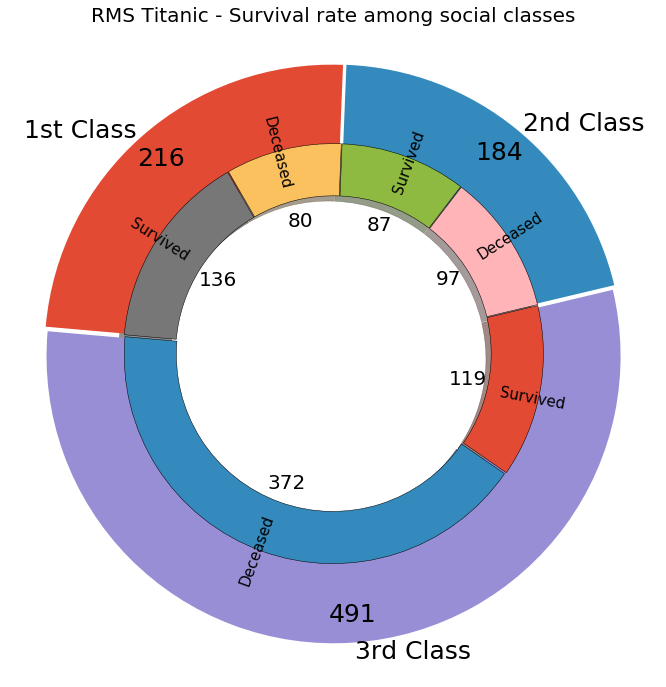

In [14]:
# functions which turn the percent on the pie chart into the actual values
def absolute_value1(val):
    a  = np.round(val/100*sum(class_count), 0)
    return int(a)
def absolute_value2(val):
    a  = np.round(val/100*sum(class_survival), 0)
    return int(a)

# Outer pie data - Class distribution
first_class = df_train["Pclass"][df_train["Pclass"]==1].count()
second_class = df_train["Pclass"][df_train["Pclass"]==2].count()
third_class = df_train["Pclass"][df_train["Pclass"]==3].count()
class_count = [first_class, second_class, third_class]

# Inner pie data - Survival vs deceased
first_class_survived = df_train["Survived"][(df_train["Pclass"]==1) & (df_train["Survived"]==1)].count()
first_class_deceased = df_train["Survived"][(df_train["Pclass"]==1) & (df_train["Survived"]==0)].count()
second_class_survived = df_train["Survived"][(df_train["Pclass"]==2) & (df_train["Survived"]==1)].count()
second_class_deceased = df_train["Survived"][(df_train["Pclass"]==2) & (df_train["Survived"]==0)].count()
third_class_survived = df_train["Survived"][(df_train["Pclass"]==3) & (df_train["Survived"]==1)].count()
third_class_deceased = df_train["Survived"][(df_train["Pclass"]==3) & (df_train["Survived"]==0)].count()
class_survival = [first_class_survived, first_class_deceased, second_class_survived,
                  second_class_deceased, third_class_survived, third_class_deceased]

# initialize plt
fig, ax = plt.subplots(figsize=(12,12))
# plotting outer pie
_, texts1, autotexts1 = ax.pie(class_count, labels=["1st Class", "2nd Class", "3rd Class"]
                               ,pctdistance=0.9, labeldistance = 1.03, counterclock=False,
                               wedgeprops = {"width":0.4}, radius=1.1, explode=(0.01,0.01,0.01),
                               autopct=absolute_value1, startangle=175)
# plotting inner pie
_, texts2, autotexts2 = ax.pie(class_survival,
                               labels=["Survived","Deceased","Survived","Deceased","Survived","Deceased"],
                               pctdistance=0.65, labeldistance = 0.8, radius=0.8, rotatelabels=1,
                               wedgeprops ={"width":0.2,"edgecolor":'black'}, autopct=absolute_value2,
                               explode = (0.005,0.005,0.005,0.005,0.005,0.005), startangle=175, 
                               shadow=True, counterclock=False)

[num.set_fontsize(25) for num in autotexts1]
[text.set_fontsize(25) for text in texts1]; # increase label font size
[num.set_fontsize(20) for num in autotexts2]
[text.set_fontsize(15) for text in texts2]; # increase label font size
ax.set_title("RMS Titanic - Survival rate among social classes", fontsize = 20);

**Conclusions**:
1. Out of the 891 samples in the training data 491 of passengers aboard were from the first class, 184 from the second class, and 216 from the third class.
2. The biggest amount of survivors were from the 1st class, although they are proportionally more than half the size of the 3rd class.


#### Survival rates per class
Lets see check relative survival rate per each class.

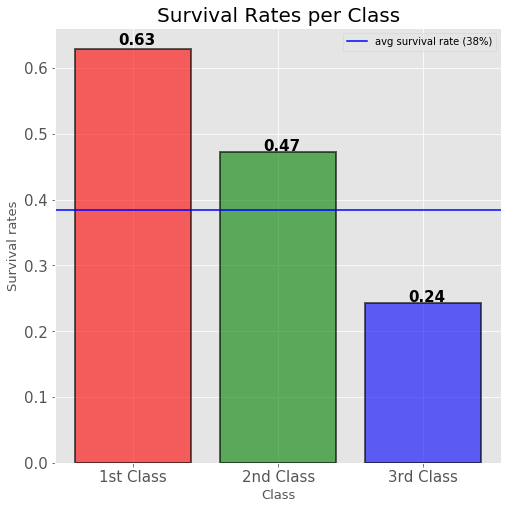

In [15]:
first_class_survived_rate = first_class_survived / first_class
second_class_survived_rate = second_class_survived / second_class
third_class_survived_rate = third_class_survived / third_class
survival_class_rates = [first_class_survived_rate, second_class_survived_rate, third_class_survived_rate]

fig,ax = plt.subplots(figsize=(8,8))
ax.axhline(avg_survival_rate,color="blue")
bars = ax.bar(x=["1st Class","2nd Class","3rd Class"], color=["red","green","blue"],
              height=survival_class_rates, alpha=0.6, edgecolor='black', linewidth=2)

ax.legend(labels=["avg survival rate (38%)"])
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
for index, value in enumerate(np.around(survival_class_rates,2)):
    ax.text(x=index-0.1, y=value+0.005, s=f"{value:,}", color='black', fontweight='bold',size=15);
ax.set_title("Survival Rates per Class",size=20)
ax.set_xlabel("Class",size = 13)
ax.set_ylabel("Survival rates", size=13);

Note - The survival rates per class were calcuclated in the following way:
1. The survival rate in the first class:<br><br>
\begin{align}
\frac{136\:(1st\:class\:survivors)}{216\:(total\:1st\:class)}*100 = 63\%\:(1st\:class\:survival\:rate)
\end{align}
<br><br>
2. The survival rate in the second class:<br><br>
\begin{align}
\frac{87\:(2nd\:class\:survivors)}{184\:(total\:2nd\:class)}*100 = 47\%\:(2nd\:class\:survival\:rate)
\end{align}
<br><br>
3. The survival rate in the third class:<br><br>
\begin{align}
\frac{119\:(3rd\:class\:survivors)}{491\:(total\:3rd\:class)}*100 = 24\%\:(3rd\:class\:survival\:rate)
\end{align}
<br><br>

As we can see, The survival rates are correlated with the social status of the passengers - 1st class passengers survival rate (62%) was almost 3 times higher than the survival rate of the third class (24%)... **But why?**

<br><br>
The following article from the BBC - ["Five Titanic myths spread by films"](https://www.bbc.com/news/magazine-17515305) gives these answers. Here's an excerpt:
![titanic_thirdclass_survival](img/titanic_thirdclass_survival.jpg)
**In short:** 
1. The third class sections didn't have any lifeboats, as opposed to the 1st and 2nd classes
2. The 3rd class habitats were placed furthest from the boats, and it was difficult to reach them.
3. Some of the 3rd class passengers were reluctant to leave the ship, unwilling to leave their possessions behind 
4. No evidence exists which points to any malicious intent towards these passengers.

### Maybe they were relatively more women and children in the 1st class?
Inorder to find another explanation to the high survival rate of the 1st class, we set out to check if there were relatively more women and children in the 1st class, which may have contributed to the high survival rate of this class.

#### First, we'll check the absolute values for women and children per class:

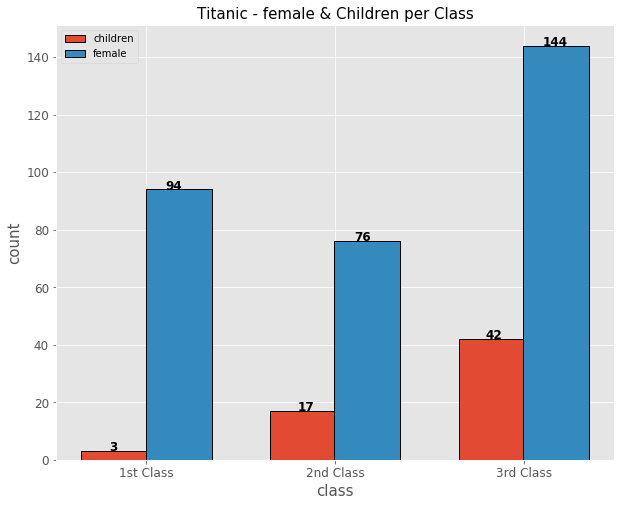

In [16]:
children_1st_class = df_train.loc[(df_train['Pclass'] == 1) & (df_train['Age']<10),'Age'].count()
children_2nd_class = df_train.loc[(df_train['Pclass'] == 2) & (df_train['Age']<10),'Age'].count()
children_3rd_class = df_train.loc[(df_train['Pclass'] == 3) & (df_train['Age']<10),'Age'].count()
female_1st_class = df_train.loc[(df_train['Pclass'] == 1) & (df_train['Sex']=='female'),'Sex'].count()
female_2nd_class = df_train.loc[(df_train['Pclass'] == 2) & (df_train['Sex']=='female'),'Sex'].count()
female_3rd_class = df_train.loc[(df_train['Pclass'] == 3) & (df_train['Sex']=='female'),'Sex'].count()

children_per_class = np.array([children_1st_class, children_2nd_class, children_3rd_class])
female_per_class = np.array([female_1st_class, female_2nd_class, female_3rd_class])

ind = np.arange(3)
width = 0.35
space = 0.17
labels = ["1st Class","2nd Class","3rd Class"]

#plotting the graph
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(ind-space, children_per_class, width, edgecolor='black', linewidth=1)
ax.bar(ind+space, female_per_class, width, edgecolor='black', linewidth=1)
plt.xticks(ind, labels)

for index, value in enumerate(children_per_class):
    ax.text(x=index-0.2, y=value, s=f"{value:,}", color='black', fontweight='bold',fontsize=12);
for index, value in enumerate(female_per_class):
    ax.text(x=index+0.1, y=value, s=f"{value:,}", color='black', fontweight='bold',fontsize=12);

ax.legend(["children", "female"])                
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_title("Titanic - female & Children per Class",size=15)
ax.set_xlabel("class",size = 15)
ax.set_ylabel("count", size=15);

#### now we can investigate the relative proportion of children and female per class

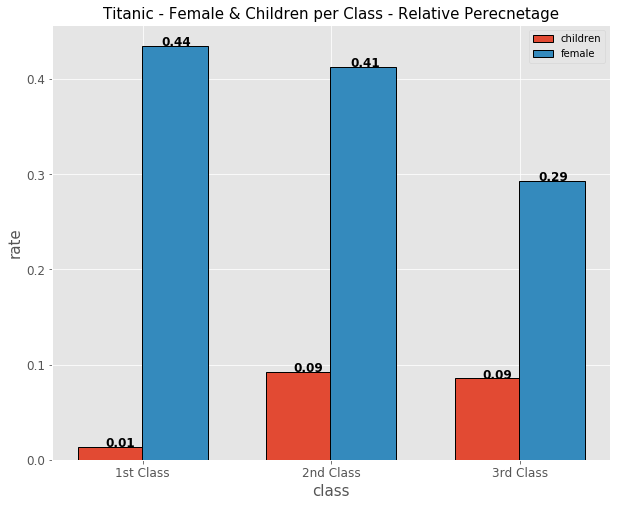

In [17]:
fig,ax = plt.subplots(figsize=(10,8))

relative_children_per_class = children_per_class/np.array([first_class,second_class,third_class])
relative_female_per_class = female_per_class/np.array([first_class,second_class,third_class])
ax.bar(ind-space, relative_children_per_class, width, edgecolor='black', linewidth=1)
ax.bar(ind+space, relative_female_per_class, width, edgecolor='black', linewidth=1)
plt.xticks(ind, labels)

for index, value in enumerate(relative_children_per_class):
    ax.text(x=index-0.2, y=value, s=f"{round(value,2):,}", color='black', fontweight='bold',fontsize=12);
for index, value in enumerate(relative_female_per_class):
    ax.text(x=index+0.1, y=value, s=f"{round(value,2):,}", color='black', fontweight='bold',fontsize=12);

ax.legend(["children", "female"])                
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_title("Titanic - Female & Children per Class - Relative Perecnetage",size=15)
ax.set_xlabel("class",size = 15)
ax.set_ylabel("rate", size=15);

**Conclusion**: <br>According to the graph, the 1st class had the highest relative amount of feamles -  this can explain in some sense why the survival rate of the 1st class was much higher, and this coincides with  **women** & children first protocol.

### Titanic passenger's age and its affect on survival rate
As we've showed earlier, the titanic passengers and crew have followed the "women and children first" protocol. Logic dictates that due to this protocol,  the younger the passenger was the more likely he would to survive, since children were "first". Let see what the data shows.
<br><br>
First, we'll check the age distribution among the Titanic's crew & passengers:

#### Age distribution on the Titanic

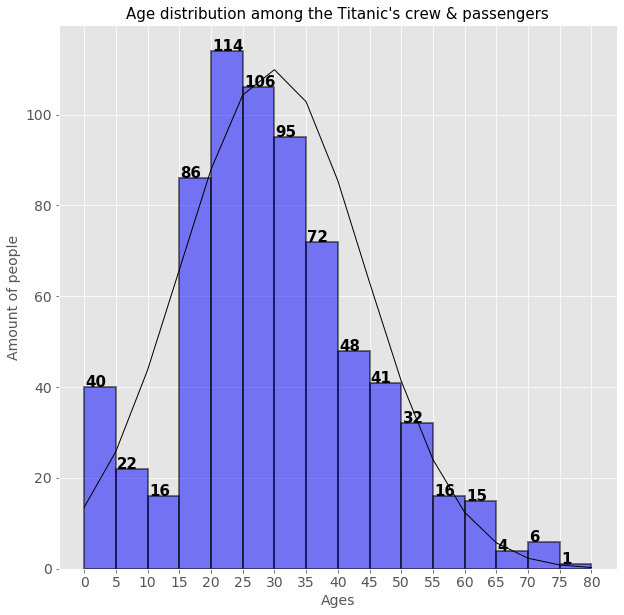

In [18]:
from scipy.stats import norm
import matplotlib.mlab as mlab

# plotting histogram
fig, ax = plt.subplots(figsize=(10,10))

age_bins = np.arange(0,85,5)
all_ages = df_train.loc[df_train['Age'].notnull(),'Age']
ax.set_xticks(age_bins)
ax.set_ylabel('Amount of people',size=14)
ax.set_xlabel('Ages', size=14)
n, _, _ = ax.hist(all_ages, bins=age_bins, facecolor='blue',alpha=0.5, edgecolor='black', linewidth=2)  

# plotting curve fit
(mu, sigma) = norm.fit(all_ages)
y = norm.pdf(age_bins,mu,sigma)
plt.plot(age_bins, y*4000, 'black', linewidth=1)

ax.set_title("Age distribution among the Titanic's crew & passengers", size=15)
ax.tick_params(axis='both', which='major', labelsize=14)

for index, value in enumerate(n):
    ax.text(x=index*5+.2, y=value, s=f"{int(value):,}", color='black', fontweight='bold',size=15);
    
plt.show()

In [19]:
all_ages.describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


**Conclusions**:
<br><br>
The histogram above shows the age distribution among the Titanic. For example:<br>
1. There were 114 people aging between 20-25.
2. There were 106 people aging between 26-30.

From the table above we notice that there are only 714 samples, and as we've noted before the data set holds 891 samples. This means that 177 age samples are missing.
<br>
As seen by the curve we've plotted the histogram is skewed left, which means that most of passengers were mostly young adults aging at 30 years old (also the average age).


#### Age vs survival rate
Now that we've seen the age distribution on the titanic, we can look for the relationship between the age of a passenger and his survival rate.

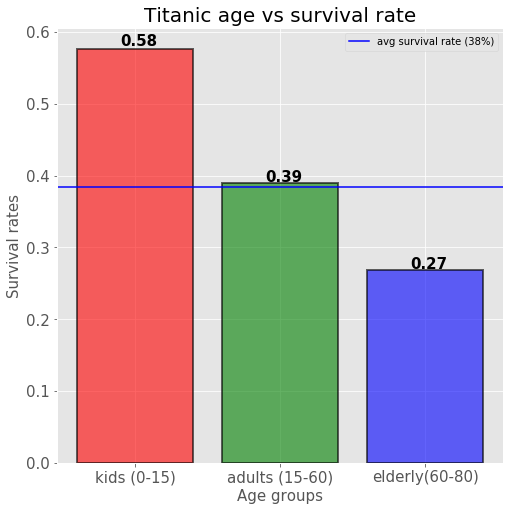

In [20]:
kids = df_train.loc[(df_train["Age"]>=0) & (df_train["Age"]<15)]
adults = df_train.loc[(df_train["Age"]>=15) & (df_train["Age"]<60)]
elderly = df_train.loc[(df_train["Age"]>=60) & (df_train["Age"]<85)]

# survival rates by age
kids_survival_rate = len(kids.loc[kids["Survived"]==1]) / len(kids)
adults_survival_rate = len(adults.loc[adults["Survived"]==1]) / len(adults)
elderly_survival_rate = len(elderly.loc[elderly["Survived"]==1]) / len(elderly)
age_survival_rates = [kids_survival_rate, adults_survival_rate, elderly_survival_rate]

#plotting the graph
fig,ax = plt.subplots(figsize=(8,8))
ax.axhline(avg_survival_rate,color="blue")
bars = ax.bar(x=["kids (0-15)","adults (15-60)","elderly(60-80)"], color=["red","green","blue"],
              height=age_survival_rates, alpha=0.6, edgecolor='black', linewidth=2)

ax.legend(labels=["avg survival rate (38%)"])
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
for index, value in enumerate(np.around(age_survival_rates,2)):
    ax.text(x=index-0.1, y=value+0.001, s=f"{value:,}", color='black', fontweight='bold',size=15);
ax.set_title("Titanic age vs survival rate",size=20)
ax.set_xlabel("Age groups",size = 15)
ax.set_ylabel("Survival rates", size=15);

**Conclusion**:
<br><br>
As the bar chart shows, regardless of the social class, the kids on the Titanic, aging between 0-15, had the highest survival rate (58%), more than any other group. The kids surpassed the average survival rate which stands on 38%. The elderly had the poorest survival rates.<br><br>

Again, these findings go hand in hand with the "woman and children first" protocol.
As a complementary graph to age survival rates bar chart, we'll also show the survival rates by sex in the same manner.

#### Survival of children
How many children have survived the distaster? we define children here as passengers up to the age of 8.

In [21]:
survived_children = df_train.loc[(df_train["Survived"]==1) & (df_train["Age"]<=8),'Age'].count()
perished_children = df_train.loc[(df_train["Survived"]==0) & (df_train["Age"]<=8),'Age'].count()
df_children = pd.DataFrame({'Survived':[survived_children],'Perished':[perished_children], 
                            'Total':[survived_children+perished_children]})
print("Survival of children up to age the of 8:")
df_children
# perished_children = df_train.loc[(df_train["Age"]>=0) & (df_train["Age"]<15)]

Survival of children up to age the of 8:


,Survived,Perished,Total
0,36,18,54


**Conclusion**:<br>
As we can see, 2/3 of children aboard the titanic have survived the disaster.

#### Who were the youngest and oldest passengers?
As a side quest, we would like to investigate who were the youngest and oldest passengers on board.

In [22]:
youngest = df_train.sort_values(by="Age", ascending=False).iloc[0]
oldest = df_train.sort_values(by="Age", ascending=True).iloc[0]
pd.DataFrame([youngest,oldest])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


**The youngest passenger**:<br><br>
According to the table, the youngest passenger was Assad Alexander who's was 0.42, meaning ~4 months. This information is incorrect. The youngest passenger  appears in the testing data set & not in the traning set which we're exploring right now.<br><br>
The youngest passenger aboard was Eliza Gladys "Millvina" Dean. Born in 02/02/1912 Her age was 2 months and 13 days at that time. She was also the last survivor of the Titanic. She died at the age of 97, in 31/05/2009.<br>
![Women_And_Children_First_The_Sphere.jpg](img/milvina_dean.jpg)
<br><br>

**The oldest passenger**:<br><br>
According to the table the oldest passenger was Mr Algernon Henry Barkworth who's age was 80. After a further investigation we conclude that this is **purely a mistake**. As seen [here](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html) Henry's age at that time was actually 47!

The oldest person on the titanic was actually Mr Johan Svensson who's age was 74. Both Johan and his son died in the sinking and their bodies, if recovered, were never identified. More info about him can be found [here](https://www.encyclopedia-titanica.org/titanic-victim/johan-svensson.html).
![Women_And_Children_First_The_Sphere.jpg](img/johan_svensson.JPG)


### Honorifics Analysis
looking at the name column we've noticed that it contains honorifcs - a title which expresses a status or respect. for example in the following snippet of the table we can see that Owen Hrris Braund (row 0) held the "Mr." honorific (first row).

In [23]:
df_train.head(5)["Name"].to_frame()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Lets count the passengers by their honorifics to see if something interesting comes up:

In [24]:
x = df_train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
x.value_counts().sort_values().to_frame("Count")


,Count
Capt,1
Sir,1
Don,1
Ms,1
Countess,1
Mme,1
Jonkheer,1
Lady,1
Major,2
Col,2


According to the this data the titanic had a passenger whose title was "Jonkheer". Lets find out the name of that person, and what this title actually means:

In [25]:
df_train.loc[df_train["Name"].str.contains("Jonkheer")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


![johkheer](img/jonkheer_george_reuchlin.jpg)
The Reuchlin children, including Johan George (in the picture above) were allowed to used the "Jonkheer" title, which was given by the dutch goverment by a royal decree, ands suggests a noble heritage.<br><br>

Johan George was born in 1874 Rotterdam, Netherlands. His father Otto Reuchlin was a director of the "Holland America Line" a cruise line company for tourism. Later, Johan George became the director of the company.<br><br>

His ticket was complementary (free) 1st class ticket because of his position in the company which was part of the "Internation Mercatile Marine Company" conglomerate that also owned the "White Star Line" - the company who owned the "titanic".<br><br>

Reuchlin died in the disaster and his body was never found.

sources:
<br>
[https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html](https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html)<br>
[https://www.geni.com/people/Jonkheer-Johan-George-Reuchlin/6000000015519745032](https://www.geni.com/people/Jonkheer-Johan-George-Reuchlin/6000000015519745032)

Another notable mention is the woman who held the "Countess" title:

In [26]:
df_train.loc[df_train["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


![countess](img/countess_of_rothes.jpg)
The Countess of Rothes (Lucy Noel Marthas Dyer-Edwards) was born 1878, London. In the book "Lifeboat No. 8" from 2018 by Elizabeth Kaye, it is told that she was one of the wealthiest passengers on the ship. She boarded the titanic as a first class passenger with the intent of meeting up with her husband in America.<br><br>

She rowed the lifeboat together with another sailor, Thomans William Jones, with whom she corresponeded until her dath. The countess offered comfort and support to the survivors in the lifeboat. When the lifeboat was picked up by the RMS Carpathia ship, she devoted herself to the care of woman and children.

The Countess of Rothes was also portrayed in James Cameron's "Titanic" movie, portrayed by Rochelle Rose:
![countess_movie](img/countess_movie.jpg)<br><br>


sources:<br>
[https://www.themarysue.com/the-countess-of-rothes/](https://www.themarysue.com/the-countess-of-rothes/)<br>
[https://www.encyclopedia-titanica.org/titanic-survivor/countess-of-rothes.html](https://www.encyclopedia-titanica.org/titanic-survivor/countess-of-rothes.html)<br>
[https://titanicdatabase.fandom.com/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes](https://titanicdatabase.fandom.com/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes)<br>
[https://jamescameronstitanic.fandom.com/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes](https://jamescameronstitanic.fandom.com/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes)


In the following video, the author of the book "Lifeboat No.8" describes, among other things, the experience of the Countess on lifeboat 8.

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZHr0cMSGA08?start=1319', width=560, height=315)

### How did big families handeled the disaster?
According to the descriptive statistics we've shown at the start of the notebook, it can be inferred that the Titanic had at least one family with 8 members. This got us thinking, how many families were at the Titanic? how big they we're? and of course, how did they handle the disaster?

#### Checking the family sizes on the titanic
To learn what happened to families during the sinking of the Titanic, we must first check how many families were on board, and inspect their size (amount of family memebers).

In [28]:
siblings_max = 8 #inferred from the descriptive statistics at the start of the notebook
familiy_size = np.arange(0,siblings_max+1) 
unfiltered_group_size = [] # for example 608 people had 0 siblings
for i in familiy_size:
   unfiltered_group_size.append(len((df_train.loc[df_train["SibSp"]==i])))

group_size = []
for index,value in enumerate(unfiltered_group_size):
    group_size.append(value/(index+1) if (value%(index+1))==0 else np.ceil(value/(index+1)))
group_size = [int(i) for i in group_size]

In [29]:
group_size

[608, 105, 10, 4, 4, 1, 0, 0, 1]

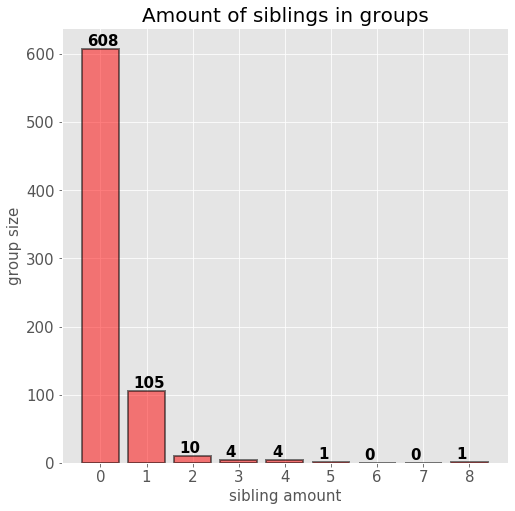

In [30]:
#plotting the graph
fig,ax = plt.subplots(figsize=(8,8))
bars = ax.bar(x=familiy_size, height=group_size, alpha=0.5, edgecolor='black', linewidth=2, color="red")

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
for index, value in enumerate(group_size):
    ax.text(x=index-0.28, y=value+5, s=f"{value:,}", color='black', fontweight='bold',size=15);
ax.set_xticks(familiy_size)
ax.set_title("Amount of siblings in groups",size=20)
ax.set_xlabel("sibling amount",size = 15)
ax.set_ylabel("group size", size=15);

**Conclusions**:
1. A whopping 608 passengers were lone travelers - had 0 siblings on board the Titanic.
2. According to the data, the biggest family on board had 8 members, only followed by a single family of 5 members.<br>
Lets check who the 8-member family was:

In [31]:
df_train.loc[df_train["SibSp"]==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Conclusion**:<br>
According to the data, the Sage family was the largest family on the Titanic with 8 members who did not survive the disaster. In addition, according to the [following article](https://www.bbc.com/news/uk-england-cambridgeshire-17596264#:~:text=When%2011%20members%20of%20a,of%20life%20from%20one%20family.&text=John%20and%20Annie%20Sage%20were,running%20a%20pub%20in%20Norfolk.) the family true size was actually 11, and all we're perished in the event. Here's an excerpt:
![titanic_sage_article](img/sage_family.jpg)
This is the best picture of the family we could find:
![the_sage_family](img/sage_family_photo.JPG)


## Question 3 -  Data preparation
In the following question we need to perform two tasks: 1. feature engineering 2. Handle missing values.

### Loading the testing set
Feature engineering and data imputation (filling missing values) will be perfmored on the training set and testing set simultaneously.<br><br>
**Important note** - missing values in the testing set will be filled  by the data we infer **only** from the training set! We make sure that there is no **data leakage** between the training and testing set, meaning we won't infer any information from the testing set about the overall data!

In [32]:
df_test = pd.read_csv("data/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Missing Data
In this section we'll deal with the data imputation - filling in null samples with the most possibly accurate values we can deduce from the available data.

#### Checking null values
We'll check if any null values exist in the training and testing sets.

In [33]:
nulls_training = pd.isnull(df_train).sum()
nulls_testing = pd.isnull(df_test).sum()
pd.DataFrame({"Nulls -Training set": nulls_training, "Nulls - Testing set": nulls_testing})

,Nulls -Training set,Nulls - Testing set
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


**Conclusions**:
1. Both in training and testing data sets, most of the nulls are in "Age" & "Cabin" features.
2. There are 2 nulls in "Embarked" in the training set and 1 null in "Fare" in the testing set.
3. The "Survived" feature does not exists in the testing set (since it is the one we need to predict).

#### Handling missing values - "Age" feature
We'll start with the "Age" feature. As we've seen above, it has 177 nulls in the training set and 86 nulls in the testing set. The first which comes to mind is to fill the "Age" feature with the median of the feature. But there is a better, more accurate option. <br><br>

To find out, lets check again the "Name" feature:


In [34]:
df_train["Name"].to_frame("Honorifcs")

,Honorifcs
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


**Conclusion**: <br><br>
It's seems that the name column also holds honorifics of the person - for example Mr, Mrs...
This can help us group people by their honorific, get their mean age, and apply this mean to samples with null "Age" which have the same honorfic.

##### Creating  the honorific feature
lets extract the honorifics from each name and create a "honorific" column.<br> This will be done for the testing & training set simultaneously:

In [35]:
datasets = [df_train, df_test]
for dataset in datasets:
    dataset['Honorific'] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
    #' ([A-Za-z]+)\.' means - grab the a word occuring between a space and the character "." 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


As seen in the training set above, there is now a new column (the last one) which holds the honorific of each sample which were derived from their names.<br>
Lets inspect what kind of honorifcs were held by the people onboard the Titanic, and what was the mean for each honorific group:

In [36]:
df_honorifics= df_train.groupby(by="Honorific")["PassengerId"].nunique().to_frame("Count")
df_honorifics["Mean Age"] = df_train.groupby(by="Honorific")["Age"].mean().astype(int)
df_honorifics

,Count,Mean Age
Honorific,,
Capt,1,70
Col,2,58
Countess,1,33
Don,1,40
Dr,7,42
Jonkheer,1,38
Lady,1,48
Major,2,48
Master,40,4


**Conclusion**:<br>
The table above shows the group size for each honorific and its average age. The data was extrapolated only from the training set.

Next we'll apply the mean age of each honorific to the samples with the same honorific, but which their age feature is null:

In [37]:
# for each title we compute the mean of the samples which are not null (taken only from the training set),
# and apply those means to the samples which contain the same title, but their age is null, (done
# both the training & testing set)
for honorific in df_honorifics.index:
    mean = df_train.loc[(df_train["Honorific"] == honorific) & (df_train["Age"].notnull())]["Age"].mean()
    mean = int(round(mean))
    df_train.loc[df_train["Honorific"]==honorific,"Age"] = df_train.loc[df_train["Honorific"]==honorific,"Age"].fillna(mean)
    df_test.loc[df_test["Honorific"]==honorific,"Age"] = df_test.loc[df_test["Honorific"]==honorific,"Age"].fillna(mean)

#### Handling missing values - "Cabin" feature
The next feature we'll tackle is the "Cabin" feature which holds a whopping 687 nulls out of 891 samples in the dataset. This means we only have 204 cabin samples - roughly 25% of the data.<br><br>

The first thing which comes to mind of course is to just drop the feature and move on. Despite the urge, we've decided to try and revive this feature by extrapolating whatever information we can from the current available data inorder to complete the missing Cabin values in null samples.<br><br>

First lets check the raw cabin feature:

In [38]:
df_train.loc[df_train["Cabin"].notnull(),"Cabin"].to_frame()

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
...,...
871,D35
872,B51 B53 B55
879,C50
887,B42


**Conclusion:**<br>
It seems that each cabin name is comprised from an initial letter and a number. Some samples like 872 contain multiple values. [Further research](https://www.encyclopedia-titanica.org/cabins.html) shows that the initials are actually the name of the decks and the numbers represent room numbers. For example C85 (sample 1) means C deck, room 85.

The docks are clearly illustrated in the following cross-section diagram of the Titanic. The dock letters are dpecited at the sided of the diagram (marked in the blue rectangle):<br>
![titanic_cutaway](img/titanic_cutaway.png)

##### Transforming cabins into decks
Since the cabin feature is sparse as it is, we've chosen to ignore the room numbers. Therefore we must traverse all existing cabin data and replace all non-null values with cabin-only names. For example, a sample with a cabin data "C85" will now hold only "C" as cabin. <br>
Since the cabin feature will now hold only dock information, it will be renamed into docks. This will be done to the training and testing set.

In [39]:
for dataset in datasets:
    dataset.loc[dataset["Cabin"].notnull(),"Cabin"] = dataset.loc[dataset["Cabin"].notnull(),"Cabin"] .str.slice(0,1)
    dataset.rename(columns = {"Cabin":"Deck"}, inplace = True)
df_decks = df_train.loc[df_train["Deck"].notnull(),"Deck"].to_frame()
df_decks

,Deck
1,C
3,C
6,E
10,G
11,C
...,...
871,D
872,B
879,C
887,B


In [40]:
decks = df_decks.groupby(by="Deck").count().index
print(decks.values)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']


**Conclusion**: <br>
As seen in the table above, the "Cabin" feature is now renamed into "Deck" and contains the deck name of the passenger. The decks are: A, B, C, D, E, F, G, T

##### Population size in each deck
Out of the information we got, lets see which deck housed the most passengers

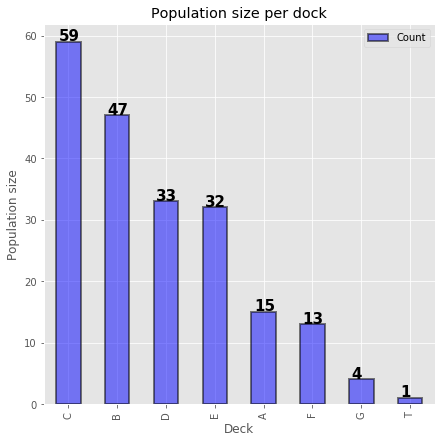

In [41]:
df_deck_sizes = df_train.groupby(by="Deck").count()["PassengerId"].to_frame("Count").sort_values("Count",ascending=False)
ax = df_deck_sizes.plot.bar(title="Population size per dock", alpha=0.5, edgecolor='black',
                              linewidth=2, color="blue",figsize=(7,7))
ax.set_ylabel("Population size")
for index, value in enumerate(df_deck_sizes["Count"]):
    ax.text(x=index-0.2, y=value+0.2, s=f"{round(value,2):,}", color='black', fontweight='bold',size=15);

**Conclusion**: <br>
The bar chart shows that deck C housed the most people. Deck T held only one person. This of course may not be accurate, because we base this assumption only on 204 non-null samples.

##### From where did the people with registered cabin embarked from?

In [42]:
    df_cabin = df_train.dropna()
    df_cabin_mode = df_cabin.groupby(by="Deck")["Embarked"].apply(lambda x: x.mode())
    df_cabin_mode = df_cabin_mode.reset_index(level=1)
    df_cabin_mode.iloc[0:,1:]

,Embarked
Deck,
A,S
B,S
C,S
D,S
E,S
F,S
G,S
T,S


**Conclusion**:<br>
The data shows that no matter the deck of the passenger, most people from each deck have departed from Southampton. This of course doesn't help us to make any distinction between decks.

##### Distribution of classes among decks
Now we'll check how the classes were distributed in each deck. Did a certain deck was dominated by a certain class?

In [43]:
class1_decks = df_train.loc[(df_train["Pclass"]==1) & (df_train["Deck"].notnull()),"Deck"].value_counts()
class2_decks = df_train.loc[(df_train["Pclass"]==2) & (df_train["Deck"].notnull()),"Deck"].value_counts()
class3_decks = df_train.loc[(df_train["Pclass"]==3) & (df_train["Deck"].notnull()),"Deck"].value_counts()
total = class1_decks.sum()+class2_decks.sum()+class3_decks.sum()
all_decks_zeros = pd.Series(index=decks, data=np.zeros(len(decks)),dtype=int)

class1_decks = (all_decks_zeros + class1_decks).fillna(0).astype(int)
class2_decks = (all_decks_zeros + class2_decks).fillna(0).astype(int)
class3_decks = (all_decks_zeros + class3_decks).fillna(0).astype(int)

df_decks_classes =pd.DataFrame({"1st Class":class1_decks,"2nd Class":class2_decks,"3rd class":class3_decks,
              "Total":class1_decks+class2_decks+class3_decks}).sort_values(by="Total",ascending=False)

df_decks_classes.index.name = "Deck"
# df_deck_classes.append(pd.Series([class1_decks.sum(),class2_decks.sum(),class3_decks.sum()]),ignore_index=True)
df_decks_classes.loc["Sum"] = [class1_decks.sum(),class2_decks.sum(),class3_decks.sum(),total]
df_decks_classes["class mode"] = df_decks_classes.iloc[0:,0:3].idxmax(axis=1)

df_decks_classes

,1st Class,2nd Class,3rd class,Total,class mode
Deck,,,,,
C,59,0,0,59,1st Class
B,47,0,0,47,1st Class
D,29,4,0,33,1st Class
E,25,4,3,32,1st Class
A,15,0,0,15,1st Class
F,0,8,5,13,2nd Class
G,0,0,4,4,3rd class
T,1,0,0,1,1st Class
Sum,176,16,12,204,1st Class


We can see that the classes make pretty good distinction between the decks. It seems plausible to assign the decks according the class of the passengers. We can use probability to asses the chance of a passenger being from a certain deck.

1st Class:
1. Deck C is exlcusively housed by 1st class passengers (59).
2. Deck B is exlcusively housed by 1st class passengers (47).
3. Deck A is exlcusively housed by 1st class passengers (15).
4. The majority of Deck E housed 1st class passengers (25), but it also housed 2nd & 3rd class passengers (4 and 3 respectively).

2nd Class: 
1. F had most of the 2nd class passengers. The probability of a 2nd class passenger being from F is:<br><br>
\begin{align}
\frac{8\:(2nd\:class)}{16\:(total\:2nd\:class)}*100 = 50\%\
\end{align}
<br><br>

2. D & E held 4 passengers each. The probability of a 2nd class passenger being from D or E is:
\begin{align}
\frac{4\:(2nd\:class)}{16\:(total\:2nd\:class)}*100 = 25\%\
\end{align}

3rd Class:
1. F had most of the 3rd class passengers (5). The probability of a 3rd class passenger being from F is:<br><br>
\begin{align}
\frac{5\:(3rd\:class)}{12\:(total\:3rd\:class)}*100 = 42\%\
\end{align}

2. G housed the 2nd biggest amount of 3rd class passengers (4). The probability of a 3rd class passenger being from G is:<br><br>
\begin{align}
\frac{4\:(3rd\:class)}{12\:(total\:3rd\:class)}*100 = 33\%\
\end{align}

2. Lastly, E housed the least amount of 3rd class passengers (4). The probability of a 3rd class passenger being from E is:<br><br>
\begin{align}
\frac{3\:(3rd\:class)}{12\:(total\:3rd\:class)}*100 = 25\%\
\end{align}


**Conclusion**:<br>
1. The vast majority of passengers with registered cabin data were from the 1st class (176), 16 from the 2nd class and 12 from the 3rd class. 
2. As shown in the "Survival rates among social classes" chart in the beginning of the notebook, there were 216 1st class passengers & as we've shown here 176 had registered cabin data. This helps us to conclude that samples who have missing cabin data are mostly people from the 2nd and 3rd classes. This fact is also backed up by [research](https://www.encyclopedia-titanica.org/cabins.html):
![cabin_data](img/cabin_data.jpg)<br>
3. The data shows that within the 3rd class column, deck F has the most 3rd class passengers (5), deck G is dominated by 3rd class passengers and lastly dack E also has 3 3rd class passengers.
Therefore we'll probably assign the F deck to most of the 3rd class passengers, followed by deck G and E.
4.  We can see that deck F has the 2nd class as the mode - it has 8 passengers from the 2nd class and 5 from the 3rd class. Therefore we lean towards filling all 2nd class with F deck, unless our further investigation will show otherwise. In addition we may fill the 2nd class with D & E decks, since the data shows that they also housed 2nd Class passengers.

##### Survival rates in each deck
Did some passengers from certain decks have survived better than others?

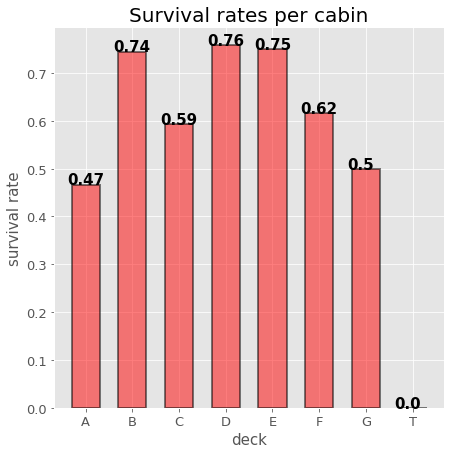

In [44]:
deck_survival_rates=[]
for deck in decks:
    deck_population = len(df_train.loc[df_train["Deck"]==deck])
    deck_survived = len(df_train.loc[(df_train["Deck"]==deck) & df_train["Survived"]==1] )
    deck_survival_rates.append(deck_survived/deck_population)

fig,ax = plt.subplots(figsize=(7,7))

ax.bar(x=decks, height=deck_survival_rates, alpha=0.5,
       width=0.6,edgecolor='black', linewidth=2, color="red")
ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
for index, value in enumerate(deck_survival_rates):
    ax.text(x=index-0.4, y=value, s=f"{round(value,2):,}", color='black', fontweight='bold',size=15);
# ax.set_xticks(familiy_size)
ax.set_title("Survival rates per cabin",size=20)
ax.set_xlabel("deck",size = 15)
ax.set_ylabel("survival rate", size=15);

**Conclusion:**
Decks B, D and E had very similar survival rates. This coincides with the high survival rates of the 1st class, but again this data doesnt help in the imputation of the data in this feature.

##### price ranges per deck
Next, we inspect the difference in fare (ticket) prices in each deck in hopes of finding a distinction between decks.

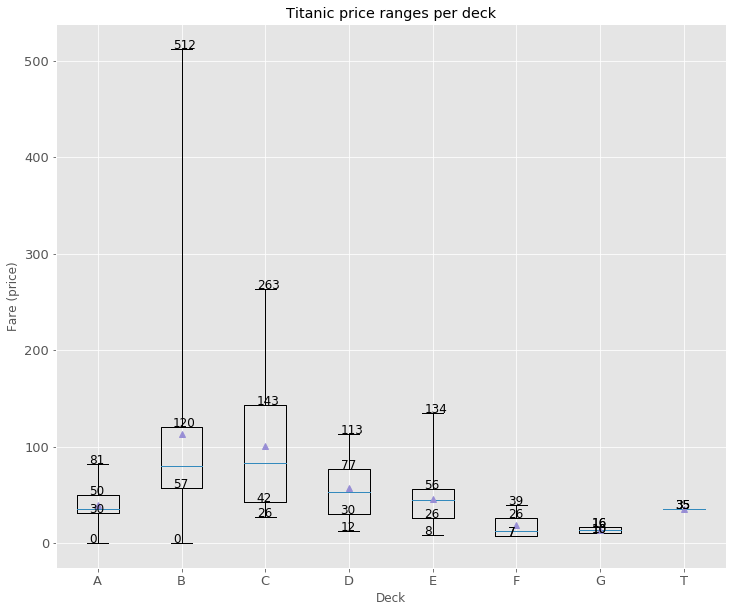

In [45]:
fare_per_decks = []
for deck in decks:
    fare_prices = list(df_train.loc[df_train["Deck"]==deck]["Fare"])
    fare_per_decks.append(fare_prices)
    
fig,ax = plt.subplots(figsize=(12,10))
box_stats = ax.boxplot(fare_per_decks, labels=decks, autorange=True, showmeans=True,whis=7);
whiskers_start = [whiskers.get_ydata()[0] for whiskers in box_stats["whiskers"]]
whiskers_end = [whiskers.get_ydata()[1] for whiskers in box_stats["whiskers"]]
# boxes = [box.get_ydata() for box in box_stats["boxes"]]

boxes = [whiskers.get_ydata()[0] for whiskers in box_stats["whiskers"]] # where 1st whisker ends & 2nd starts
whiskers = [whiskers.get_ydata()[1] for whiskers in box_stats["caps"]]

# create indexes for text creation
indexes = np.arange(len(whiskers_start))
indexes = np.repeat(indexes+1,2) # repeat index to enable the drawing of all data on each boxplot

ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
for index, value in zip(indexes,boxes):
    ax.text(x=index-0.1, y=value, s=f"{int(value):,}", color='black', size=12);
for index, value in list(zip(indexes,whiskers)):
    ax.text(x=index-0.1, y=value, s=f"{int(value):,}", color='black',size=12);
ax.set_title("Titanic price ranges per deck")
ax.set_xlabel("Deck")
ax.set_ylabel("Fare (price)");

**Conclusions:**
1. Deck A has a fare IQR (Interquartile Range - the range depcited in the box) which ranges between 30-50 and average somewhere in the middle. This helps us estimate that all people who payed the fare price within this range where from deck A.
2. Deck B has a maximum of 512 fare price, and the highest average. We conclude that deck B was the most luxorious, and people who payed anything between 100-512 were probably from deck B.

##### Main conclusions and course of action on  "Cabin" feature
The following course of action is based upon the findings from the research above:<br><br>
1st Class:
1. Deck A will be assigned to 1st class passengers who payed between 30-50 
2. Deck B will be assigned to 1st class passengers who payed between 110-512
3. We've shown what deck C was exclusively housed by 1st class passengers (59) and Deck E housed a majority of 1st class passengers (25) but also housed 2nd & 3rd class passengers.<br>
After the assginments of bullet 1 & 2, we'll assign 80% of the remaining 1st class passengers with Deck C and 20% with class E. The ratio is just an estimate, giving a clear advantage to the exclusive Deck C.<br><br>


2nd Class:
1. Deck F will be randomly assigned to 2nd class passengers with a probability of 50%.
2. Deck D & E will be randomly assigned 2nd class passengeres with a probability of 25% each.
<br><br>

3rd Class:
1. Deck F will be randomly assigned to 3rd class passengers with a probability of 42%.
2. Deck G will be randomly assigned to 3rd class passengeres with a probability of 33%.
3. Deck E will be randomly assigned to 3rd class passengeres with a probability of 25%.
<br><br>

*Since we dont have any information about dock T (it only has 1 sample), we'll just ignore it.

##### Applying the plan above to the "Cabin" feature

In [46]:
# Helper function to apply random decks with a probability
def random_deck(x,decks,probabilites):
    return np.random.choice(decks, p=probabilites)

for dataset in datasets:
    # ---------1st class--------:
    # Deck A applied to 1st class passengers who payed between 30-50
    dataset.loc[(dataset["Fare"]>=30) & (dataset["Fare"]<=50) & 
                 (dataset["Deck"].isnull()) & (dataset["Pclass"]==1), "Deck"] = "A"
    # Deck B applied to 1st class passengers who payed between 110-512
    dataset.loc[(dataset["Fare"]>=110) & (dataset["Fare"]<=512) & 
                 (dataset["Deck"].isnull()) & (dataset["Pclass"]==1), "Deck"] = "B"
    # To the nulls left from within 1st class - 
    # Deck C & E will be applied with a probability of 80% and 20& respectively
    class1_passengers = (dataset["Deck"].isnull()) & (dataset["Pclass"]==1)
    dataset.loc[class1_passengers, "Deck"] = dataset.loc[
        class1_passengers, "Deck"].apply(random_deck, args=(["C","E"],[0.8,0.2]))

    ## ---------2nd class--------:
    # Assing deck F,D & E to the 2nd class with a probability of 50,25,25 respectively
    class2_passengers = (dataset["Deck"].isnull()) & (dataset["Pclass"]==2)
    dataset.loc[class2_passengers, "Deck"] = dataset.loc[
        class2_passengers, "Deck"].apply(random_deck, args=(["F","D","E"],[0.5,0.25,0.25]))

    ## ---------3rd class--------:
    # Assing deck F,G & E to the 3RD class with a probability of 42,33,25 respectively
    class3_passengers = (dataset["Deck"].isnull()) & (dataset["Pclass"]==3)
    dataset.loc[class3_passengers, "Deck"] = dataset.loc[
        class3_passengers, "Deck"].apply(random_deck, args=(["F","G","E"],[0.42,0.33,0.25]))

#### Handling missing data - "Embarked" Feature
The data shows 2 nulls in the embarked feature within the training set. Lets impute this data.
First we find the samples with the "Embarked" nulls.

In [47]:
df_train.loc[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Honorific
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Mrs


In [48]:
df_train.groupby("Embarked").count()["PassengerId"].to_frame("Count").sort_values("Count", ascending=False)

,Count
Embarked,
S,644
C,168
Q,77


**Conclusion**: As we can see, most people have embarked from Southampton, and this is the mode of this feature. Therefore, we'll apply "S" to both missing "Embarked" values.

In [49]:
df_train.loc[df_train["Embarked"].isnull(),"Embarked"] = "S"

#### Handling missing data - "Fare" Feature
Our analysis has shown a single sample in the testing set with a null "Fare". Lets inspect this sample.


In [50]:
df_test.loc[df_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Honorific
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,E,S,Mr


We have a male from the 3rd class and Deck G, who's Fare is unknown. We'll fill this value with the median fare ticket of the group with these 3 paramaters (male & 3rd class & deck G).

In [51]:
mean = df_test.loc[(df_test["Sex"]=="male") & (df_test["Pclass"]==3) & (df_test["Deck"]=="G"),"Fare"].mean()
df_test.loc[df_test["Fare"].isnull(),"Fare"] = mean

#### Ensuring no more null values exist

In [52]:
nulls_training = pd.isnull(df_train).sum()
nulls_testing = pd.isnull(df_test).sum()
pd.DataFrame({"Nulls -Training set": nulls_training, "Nulls - Testing set": nulls_testing})

,Nulls -Training set,Nulls - Testing set
Age,0,0.0
Deck,0,0.0
Embarked,0,0.0
Fare,0,0.0
Honorific,0,0.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0


**Conclusion**: No more nulls exist!<br> *Note: there is a NaN "Survived" column in testing since it doesnt contain the "Survived" column by nature.

### Rearranging the data
As a preparation for the next section (machine learning), we move the target column ("Survived") to be the last column.<br>
In addition, the following columns will be dropped: "PassengerId", "Name", "Ticket", "Honorific","SibSp","Parch".<br>
These columns are dropped since in our opinion they logically can't have any effect on the survival of a person.

In [53]:
# this column will be dropped, so we save it for later
passengerId_test = df_test["PassengerId"] 

# moving "Survived" column as last
df_train["Survived"] = df_train.pop("Survived") 

# saving a copy of the dataframe with all the columns, incase we need it
df_train_undropped = df_train
df_test_undropped = df_test

# Removing unecessary columns from both training & testing sets
columns = ["PassengerId", "Name", "Ticket", "Honorific","SibSp","Parch"]
df_train = df_train.drop(columns=columns)
df_test = df_test.drop(columns=columns)

# label encoding categorical data (represented as digits instead of strings) 
categoricals = ["Sex","Deck","Embarked"]
df_train[categoricals] = df_train[categoricals].apply(preprocessing.LabelEncoder().fit_transform)
df_test[categoricals] = df_test[categoricals].apply(preprocessing.LabelEncoder().fit_transform)

df_train.head()

,Pclass,Sex,Age,Fare,Deck,Embarked,Survived
0,3,1,22.0,7.2500,5,2,0
1,1,0,38.0,71.2833,2,0,1
2,3,0,26.0,7.9250,5,2,1
3,1,0,35.0,53.1000,2,2,1
4,3,1,35.0,8.0500,5,2,0


## Question 4 - Machine Learning
In this part we will use machine learning models to predict titanic survivors

### Function used for to produce kaggle csv for submission purposes

In [62]:
def make_submission(filename,model):
    predictions = model.predict(holdout)
    # The following affects ONLY the predictions coming from nueral network which need to be rounded.
    predictions = (predictions > 0.5).astype(int).reshape(holdout.shape[0])
    submission = pd.DataFrame({'PassengerId':passengerId_test,'Survived':predictions})
    submission.to_csv(f'{filename}.csv',index=False)

### Splitting the training set to a traning and testing set - for optimizations
The training dataframe is split into a train & test dataset. This is done inorder to optimize the machine learning algorithms. The actual Kaggle testing data set is left untouched in this process, until we use it for predictions with the optimized models. The Kaggle ‘test’ dataset will be called from now on the **holdout** dataset, which is the technical name given to this type of data used only for final predictions.

In [55]:
X = df_train.iloc[:,:-1] # all the features
y = df_train["Survived"] # only the "survived column"
holdout = df_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

### Feature Importance

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)
df_importance = pd.DataFrame(rfc.feature_importances_, columns=['Feature_Importance'],
                              index=X_train.columns)
df_importance.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)


In [57]:
df_importance

,Feature_Importance
Sex,0.286489
Fare,0.260399
Age,0.258821
Pclass,0.084250
Deck,0.072725
Embarked,0.037316


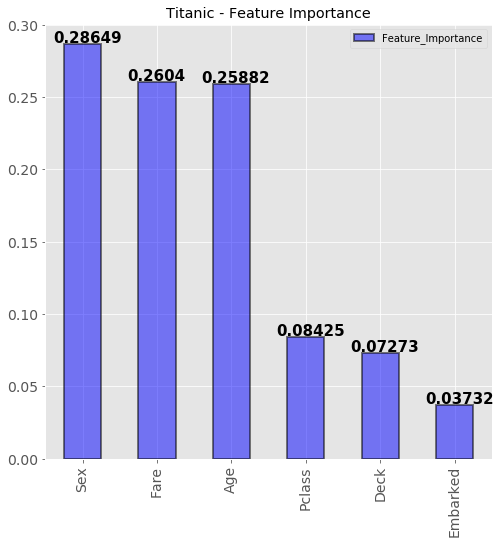

In [58]:
ax.set_ylabel('importance',size=14)
ax.set_xlabel('features', size=14)
# ax.bar(df_importance.index, height=  facecolor='blue',alpha=0.5, edgecolor='black', linewidth=2)  
ax = df_importance.plot.bar(title="Titanic - Feature Importance", alpha=0.5, edgecolor='black',
                              linewidth=2, color="blue",figsize=(8,8))

# ax.set_title("Age distribution among the Titanic's crew & passengers 23rd", size=15)
ax.tick_params(axis='both', which='major', labelsize=14)

for index, value in enumerate(df_importance['Feature_Importance']):
    ax.text(x=index-0.4, y=value+0.001, s=f"{round(value,5):,}", color='black', fontweight='bold',size=15);
    
plt.show()

**Conclusion**: the "Embarked" feature has a negligble impact on the ability to predict the survival rates. In addition, it doesn't make sense that the location from which a person embarked on the ship will have any impact on his survival rate. Therefore this feature will be dropped.

#### Dropping the embarked feature

In [59]:
X_train = X_train.drop(columns=['Embarked'])
X_test = X_test.drop(columns=['Embarked'])
holdout = holdout.drop(columns=['Embarked'])

In conclusion, this is how our training (and testing) dataset looks:

In [60]:
X_train

,Pclass,Sex,Age,Fare,Deck
114,3,0,17.0,14.4583,4
874,2,0,28.0,24.0000,5
76,3,1,32.0,7.8958,5
876,3,1,20.0,9.8458,6
674,2,1,32.0,0.0000,5
...,...,...,...,...,...
715,3,1,19.0,7.6500,5
767,3,0,30.5,7.7500,5
72,2,1,21.0,73.5000,4
235,3,0,22.0,7.5500,6


### 1. Tree Based Methods

#### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

param_grid ={'criterion':['gini', 'entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10],
             'min_samples_split':[2,3,4,5,6,7,8]}
    
# Create a grid search object
gsDCT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
best_estimator = gsDCT.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
print(f'Decision tree classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("DecisionTreeClassifier",best_estimator)

Decision tree classifier - Accuracy: 0.7686567164179104


Decision tree classifier - Kaggle score:
![dt](img/decisiontreekaggle.jpg)

#### Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200,250],
    'max_depth': [None, 50, 60, 70] ,
    'max_features': ['sqrt', 'auto'],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

estimator = RandomForestClassifier(random_state = RSEED)
gs = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1)
gs.fit(X_train,y_train)
best_estimator = gs.best_estimator_
y_pred = best_estimator.predict(X_test)
print(f'Random forest classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("RandomForestClassifier",best_estimator)

Random forest classifier - Accuracy: 0.8097014925373134


Random forest classifier - Kaggle score:
![rf](img/randomforestkaggle.jpg)

#### AdaBoost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_param_grid = {'n_estimators':[50,100,150,200,250],  
                  'learning_rate':[0.001, 0.01, 0.1, 1], 
                  'random_state': [1]}
best_estimator = GridSearchCV(adb,param_grid = adb_param_grid, cv=5, scoring="accuracy", n_jobs= -1)
best_estimator.fit(X_train,y_train)
print(f'AdaBoost classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("AdaBoostClassifier",best_estimator)

AdaBoost classifier - Accuracy: 0.7686567164179104


AdaBoost classifier - Kaggle score:
![rf](img/adaboostkaggle.jpg)

### 2. Support Vector machine

In [90]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
best_estimator = GridSearchCV(SVC(), param_grid);
best_estimator.fit(X_train, y_train);
y_pred = best_estimator.predict(X_test)
print(f'Support Vector Machine classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("SupportVectorMachine",best_estimator)

Support Vector Machine classifier - Accuracy: 0.75


Support Vector Machine classifier - Kaggle score:
![svm](img/svmkaggle.jpg)

### 3. K Nearest Neighbour (KNN)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
best_estimator = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
print(f'Support Vector Machine classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("KNN",best_estimator)

Support Vector Machine classifier - Accuracy: 0.6567164179104478


K Nearest Neighbour Vector Machine classifier - Kaggle score:
![knn](img/knnkaggle.jpg)

### 4. Neural Nets

In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=5,activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

model.fit(X_train,y_train,epochs = 1000,batch_size=10,validation_data=(X_test,y_test), verbose=0)
y_pred = model.predict(X_test)
y_pred =  (y_pred > 0.5).astype(int).reshape(X_test.shape[0])
print(f'Neural Network - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("NeuralNets",model)

Neural Network - Accuracy: 0.7723880597014925


Nueral Nets classifier - Kaggle score:
![nn](img/neuralnetskaggle.jpg)

### 5. PCA & Decision Tree classifier

In [360]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# fits PCA, transforms data and fits the decision tree classifier on the transformed data
pipe = Pipeline([('pca', PCA()), ('tree', DecisionTreeClassifier())])

params ={'tree__criterion':['gini', 'entropy'],
             'tree__max_depth':[2,3,4,5,6,7,8,9,10],
             'tree__min_samples_split':[2,3,4,5,6,7,8]}

best_estimator = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=0)
best_estimator.fit(X_train, y_train)

y_pred = best_estimator.predict(X_test)
print(f'PCA & Decision Tree Classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("PCA",best_estimator)

PCA & Decision Tree Classifier - Accuracy: 0.75


PCA & Decision Tree classifier - Kaggle score:
![pca](img/pcakaggle.jpg)

### 6. XGBoost (a method we didn't learn)

In [361]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier

gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

gbm = XGBClassifier(n_estimators=10)
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", n_iter = 50, cv = 5)
xgb_random.fit(X_train, y_train)
y_pred = xgb_random.predict(X_test)
print(f'XGBoost - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("xgboost",xgb_random)

XGBoost - Accuracy: 0.7873134328358209


XGBoost - Kaggle score:
![xgboost](img/xgboostkaggle.jpg)

### 7. Using an unsupervised clustering technique for accuracy improvement
In this task we'll use hierarchial clustering visualized by a dendogram to find out if there were some features that are more correlated with survival, in hopes of improving the accuracy of the SVM classifier (It was chosen randomly out of all the 6 classifiers above).

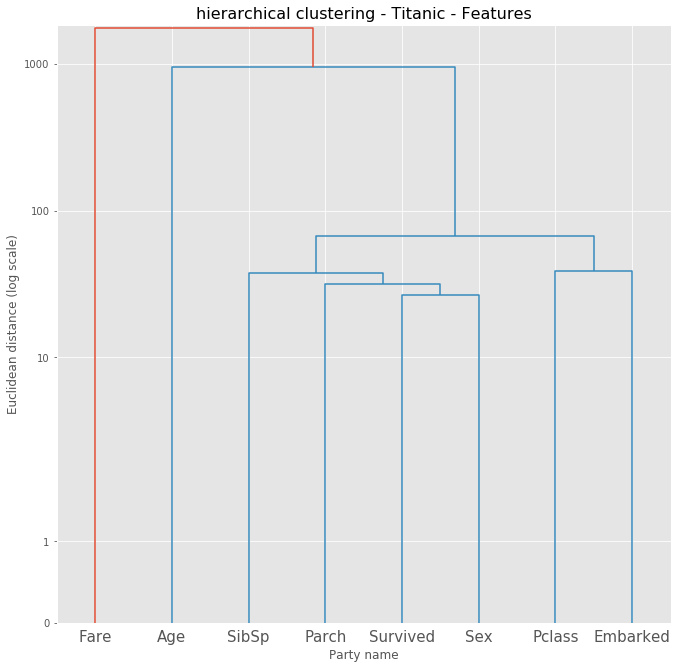

In [540]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.ticker as ticker
clustering =  numerical_df.T
mergings = linkage(clustering, method='complete')
fig, axis = plt.subplots(figsize=(11,11))
labels = list(clustering.index)
axis.set_title("Hierarchical clustering - Titanic - Features", size=16)
axis.set_xlabel("Party name")
axis.set_yscale('symlog')
axis.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

axis.set_ylabel("Euclidean distance (log scale)")
dendrogram(mergings,labels=labels, leaf_rotation=0,leaf_font_size=15, ax=axis)
plt.show()

**Conclusions**: To our suprise, the 'Parch' feature which we've previously dropped actually has correlation with the Survived feature we're trying to predict!<br>
The 'Parch' Feature descirbes the number of parents/children aboard, and was initially dropped since we thought that it didn't make any sense that the number of parents or children aborad would any difference to the survival rate of an individual.<br>
The dendogram shows otherwise, and now its up to us to add that feature back into our dataset and predict the survival of passengers via the SVM classifier to see if there is any improvment in the score.

#### Adding back the 'Parch' feature and rearranging the data

In [562]:
df_train['Parch'] = df_train_undropped['Parch']
df_train = df_train.drop(columns=['Embarked'])
df_train["Survived"] = df_train.pop("Survived")
df_test['Parch'] = df_test_undropped['Parch']
df_test = df_test.drop(columns=['Embarked'])
holdout = df_test

#### Performing a new training-test split

In [571]:
X = df_train.iloc[:,:-1] # all the features
y = df_train["Survived"] # only the "survived column"
holdout = df_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

#### Classifying the data with the new dataset using SVM

In [578]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
best_estimator = GridSearchCV(SVC(), param_grid);
best_estimator.fit(X_train, y_train);
y_pred = best_estimator.predict(X_test)
print(f'Support Vector Machine classifier - Accuracy: {accuracy_score(y_pred, y_test)}')
make_submission("SupportVectorMachine",best_estimator)

Support Vector Machine classifier - Accuracy: 0.7723880597014925


Support Vector Machine - Kaggle score:
![xgboost](img/svmkaggleimproved.jpg)

**Conclusion**: The 'Parch' feature has actually improved our classification score using SVM which went from a score of 0.732 to 0.765!